# PROYEK AKHIR : KLASIFIKASI GAMBAR
Oleh : Ghazi Taqiyya Al Anshari | taqiyyaghazi@gmail.com

# Load Image Data

In [1]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-19 14:10:07--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss  40%[=======>            ] 125.36M  1001KB/s    in 2m 40s  

2021-05-19 14:12:48 (802 KB/s) - Read error at byte 131448832/322873683 (Connection reset by peer). Retrying.

--2021-05-19 14:12:49--  (try: 2)  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (

# Ekstraksi dan Memisahkan Data


In [2]:
# Instal PIP split-folders
!pip install split-folders

In [3]:
# Melakukan ekstraksi pada file zip
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
# Inisiasi variabel yang menyimpan data 
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [5]:
# Membagi data menjadi data train (60%) dan data validasi (40%) ke direktori dataset dir
import splitfolders
splitfolders.ratio(base_dir, output='/tmp/rockpaperscissors/dataset_dir', seed=1337, ratio=(.6, .4,))

Copying files: 2188 files [00:01, 1436.73 files/s]


In [6]:
# Inisiasi variabel yang menympan data train dan data validasi
train_dir = '/tmp/rockpaperscissors/dataset_dir/train'
val_dir = '/tmp/rockpaperscissors/dataset_dir/val'

In [7]:
# Cek hasil dari split data
print('Folder dalam direktori dataset :', os.listdir('/tmp/rockpaperscissors/dataset_dir'))
print('Folder dalam direktori data train :', os.listdir(train_dir))
print('Folder dalam direktori data validasi :', os.listdir(val_dir))

Folder dalam direktori dataset : ['train', 'val']
Folder dalam direktori data train : ['scissors', 'paper', 'rock']
Folder dalam direktori data validasi : ['scissors', 'paper', 'rock']


In [8]:
# Cek rasio pembagian data train dan data validasi
total_data_train = (len(os.listdir(os.path.join(train_dir,'paper')))
                    + len(os.listdir(os.path.join(train_dir,'rock')))
                    + len(os.listdir(os.path.join(train_dir,'scissors'))))
print('Jumlah Data Training : ', total_data_train)

total_data_val = (len(os.listdir(os.path.join(val_dir,'paper')))
                    + len(os.listdir(os.path.join(val_dir,'rock')))
                    + len(os.listdir(os.path.join(val_dir,'scissors'))))
print('Jumlah Data Validasi : ', total_data_val)
print('Rasio train : val --> {:.2f} : {:.2f}'.format(total_data_train/(total_data_train+total_data_val),total_data_val/(total_data_train+total_data_val)) )

Jumlah Data Training :  1312
Jumlah Data Validasi :  876
Rasio train : val --> 0.60 : 0.40


# Augmentasi Data Gambar

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255, #untuk me-rescale nilai citra kedalam rentang 0-1
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    validation_split = 0.4)

test_datagen = ImageDataGenerator(
                    rescale=1./255, #untuk me-rescale nilai citra kedalam rentang 0-1
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    validation_split = 0.4)

In [10]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical',
        shuffle=True
)

val_generator = test_datagen.flow_from_directory(
        val_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32, # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical',
        shuffle=True,
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [11]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [12]:
val_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

# Latihan Model Convolusional Neural Network (CNN)

In [13]:
# import deep learning library
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.optimizers import RMSprop

In [14]:
# Memulai perhitungan waktu pelatihan model
import time
start_time = time.time()

In [15]:
# Perancangan CNN dengan model sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       7

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

In [17]:
history = model.fit(
      train_generator,
      steps_per_epoch=41,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=32,
      validation_data=val_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/32
41/41 - 38s - loss: 1.0921 - accuracy: 0.4802 - val_loss: 1.3478 - val_accuracy: 0.5188
Epoch 2/32
41/41 - 36s - loss: 0.5399 - accuracy: 0.8102 - val_loss: 0.3426 - val_accuracy: 0.8750
Epoch 3/32
41/41 - 36s - loss: 0.3414 - accuracy: 0.8758 - val_loss: 0.2246 - val_accuracy: 0.9125
Epoch 4/32
41/41 - 36s - loss: 0.2356 - accuracy: 0.9184 - val_loss: 0.1517 - val_accuracy: 0.9500
Epoch 5/32
41/41 - 36s - loss: 0.2313 - accuracy: 0.9230 - val_loss: 0.3988 - val_accuracy: 0.8438
Epoch 6/32
41/41 - 36s - loss: 0.1407 - accuracy: 0.9459 - val_loss: 0.1751 - val_accuracy: 0.9062
Epoch 7/32
41/41 - 36s - loss: 0.1226 - accuracy: 0.9527 - val_loss: 0.7704 - val_accuracy: 0.7563
Epoch 8/32
41/41 - 36s - loss: 0.1382 - accuracy: 0.9588 - val_loss: 0.1067 - val_accuracy: 0.9750
Epoch 9/32
41/41 - 36s - loss: 0.0728 - accuracy: 0.9726 - val_loss: 0.1726 - val_accuracy: 0.9250
Epoch 10/32
41/41 - 36s - loss: 0.1005 - accuracy: 0.9642 - val_loss: 0.1053 - val_accuracy: 0.9500
Epoch 11/

In [18]:
print("Waktu yang digunakan untuk pelatihan model : %s menit" % ((time.time() - start_time)//60))

Waktu yang digunakan untuk pelatihan model : 19.0 menit


# Evaluasi Model

In [19]:
# Skor Evaluasi model dari data training
score = model.evaluate(train_generator)
print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

41/41 [==============================] - 16s 382ms/step - loss: 0.0106 - accuracy: 0.9962
Loss: 0.0106
Accuracy: 0.9962


In [20]:
# Skor Evaluasi model dari data validation
score = model.evaluate(val_generator)
print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

28/28 [==============================] - 11s 372ms/step - loss: 0.1058 - accuracy: 0.9852
Loss: 0.1058
Accuracy: 0.9852


# Kurva training dan validation (Accuracy and Loss)

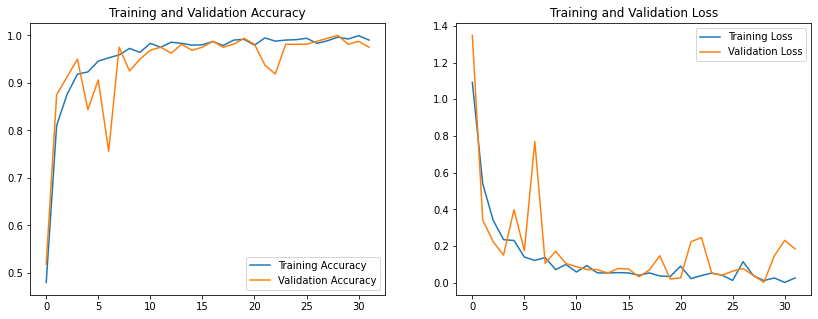

In [21]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(32)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Prediksi model dengan upload data gambar

Saving download.jpg to download (3).jpg
download.jpg
Kertas


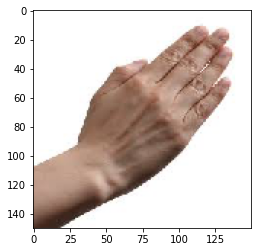

In [22]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg

%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # memprediksi gambar
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  
  print(fn)
  if classes[0,0] == 1.0:
    print('Kertas')
  elif classes[0,1] == 1.0:
    print('Batu')
  else:
    print('Gunting')